In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
df = pd.read_csv("./clean_user.csv")

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,review_count,fans,average_stars,compliment_count,votes,years_yelped,num_friends
0,2,0,4.50,0,0,8,223
1,16,0,4.69,0,4,8,0
2,3,0,1.67,0,1,4,56
3,5,0,2.00,0,5,13,0
4,11,0,4.17,0,6,9,81


In [10]:
def classify(stars):
    if stars > 4:
        return 2
    elif stars > 3: 
        return 1
    else:
        return 0

In [11]:
df['label'] = df['average_stars'].apply(lambda x: classify(x))

In [13]:
features = df.drop(columns=['average_stars', 'label'])
label = df['label']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, label)

[Text(0.5598241590214067, 0.9666666666666667, 'X[0] <= 4.5\ngini = 0.646\nsamples = 200\nvalue = [56, 54, 90]'),
 Text(0.28478593272171254, 0.9, 'X[0] <= 1.5\ngini = 0.593\nsamples = 92\nvalue = [45, 11, 36]'),
 Text(0.1437308868501529, 0.8333333333333334, 'X[4] <= 2.0\ngini = 0.485\nsamples = 41\nvalue = [17, 0, 24]'),
 Text(0.13149847094801223, 0.7666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.1559633027522936, 0.7666666666666667, 'X[3] <= 0.5\ngini = 0.465\nsamples = 38\nvalue = [14, 0, 24]'),
 Text(0.07951070336391437, 0.7, 'X[5] <= 1.0\ngini = 0.393\nsamples = 26\nvalue = [7, 0, 19]'),
 Text(0.0672782874617737, 0.6333333333333333, 'X[4] <= 3.5\ngini = 0.465\nsamples = 19\nvalue = [7, 0, 12]'),
 Text(0.05504587155963303, 0.5666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.07951070336391437, 0.5666666666666667, 'X[4] <= 8.5\ngini = 0.484\nsamples = 17\nvalue = [7, 0, 10]'),
 Text(0.04892966360856269, 0.5, 'X[4] <= 6.5\ngini = 0.5\nsamp

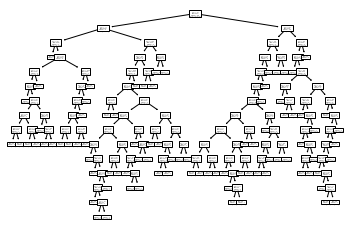

In [14]:
tree.plot_tree(clf)